#Bicubic Interpolation
### [Bicubic Interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
![](https://i.imgur.com/0WMYL73.png)

![](https://i.imgur.com/tQTZhga.png)

100%|██████████| 600/600 [00:46<00:00, 13.02it/s]


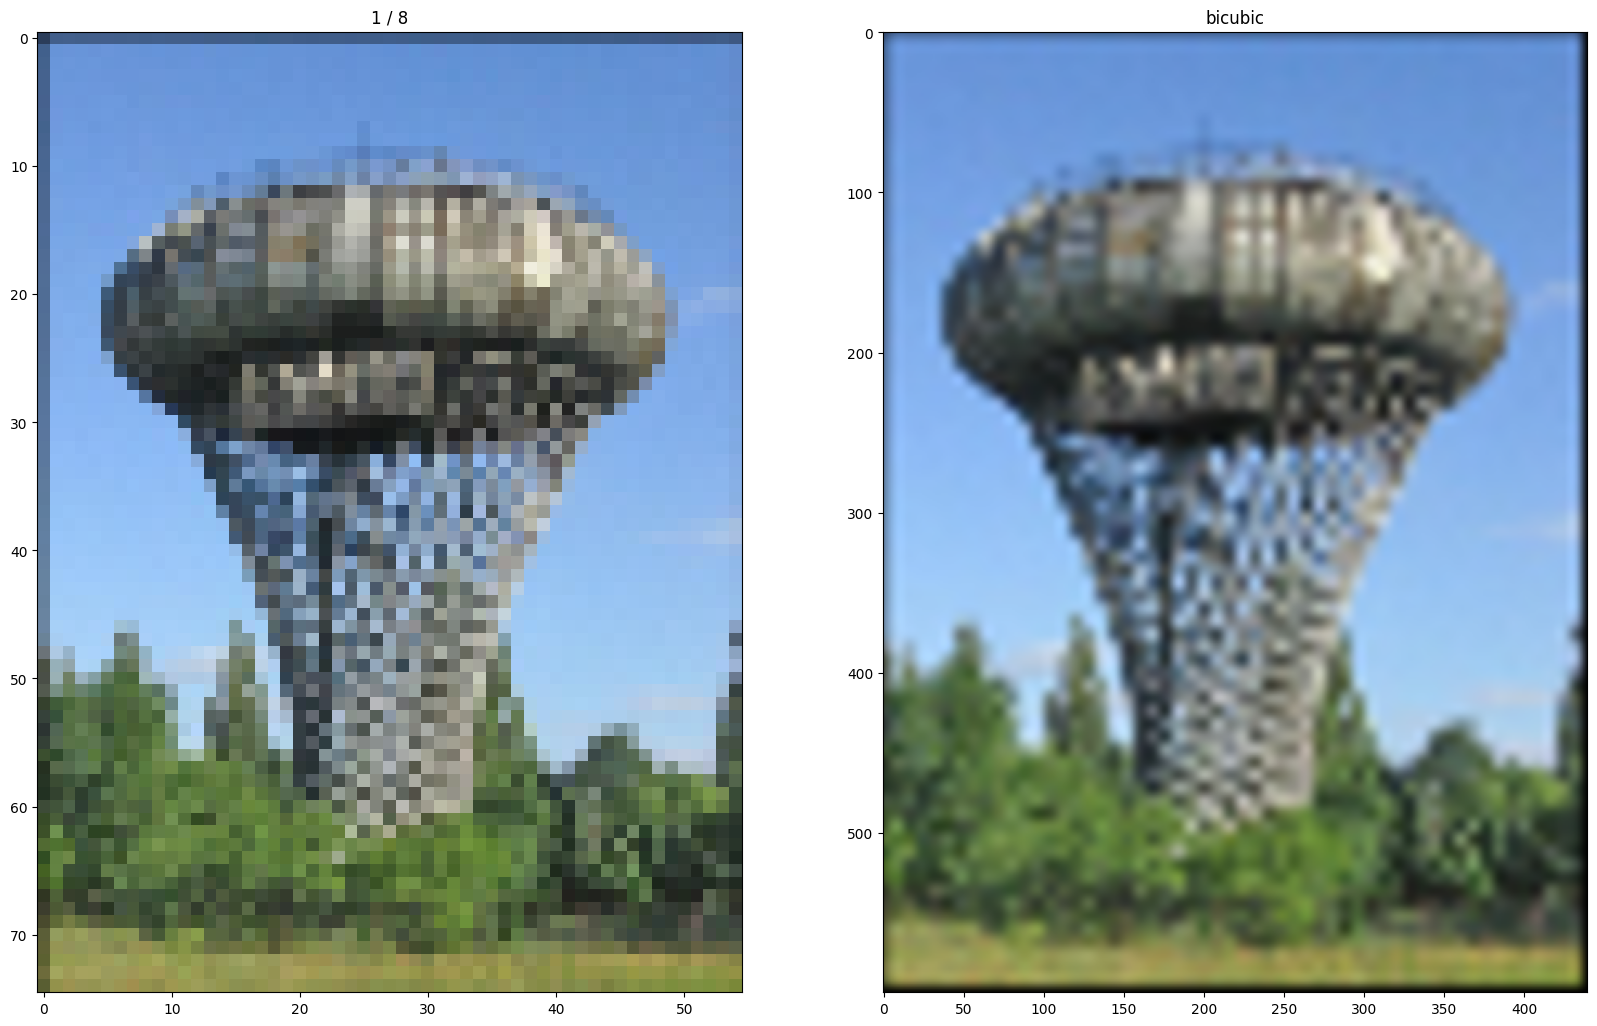

1/8 shape:  (75, 55, 3)
upsampling shape:  (600, 440, 3)


In [ ]:
# this task will use downsample_image to do Bicubic Interpolation with the scale 8.

def Bicubic_function(s,a=-0.5):
    # -------------- To do ----------------- #
  if abs(s)<1:
    k=(a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
  elif 1<=abs(s)<2:
    k=a*(abs(s)**3)-5*a*(abs(s)**2)+8*a*abs(s)-4*a
  else:
    k=0
  return k

def bicubic(img, ratio, a):
    W = int(img.shape[1]*ratio)
    H = int(img.shape[0]*ratio)
    img = padding_img(img, 2, style='edge')
    dst = np.zeros((H, W, 3))
    delta = 1/ratio
    for j in trange(H):
      for i in range(W):
        # -------------- To do ----------------- #
        y_=j*delta
        x_=i*delta
        y=math.floor(y_)
        x=math.floor(x_)
        v=y_-y
        u=x_-x
        y+=2
        x+=2
        tmp=0
        for a in range(-2,3):
          for b in range(-2,3):
            tmp+=img[y+a][x+b]*Bicubic_function(b-u)*Bicubic_function(a-v)
        dst[j][i]=tmp
    return np.clip(dst, 0, 255).astype('uint')

img_bic_hand = bicubic(downsample_image, 8, -0.5)

plt.figure(figsize=(20, 40))
plt.subplot(1, 2, 1)
plt.title('1 / 8')
plt.imshow(downsample_image)
plt.subplot(1, 2, 2)
plt.title('bicubic')
plt.imshow(img_bic_hand)
plt.show() 

print('1/8 shape: ', downsample_image.shape)
print('upsampling shape: ', img_bic_hand.shape)